# Testing A Simple Linear Regression Model to Predict Sales for Every Product Sale at Every Store

### Importing Libraries and Making the Training Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

train1 = pd.read_csv('train_1.csv', sep=',', header=0)
train2 = pd.read_csv('train_2.csv', sep=',', header=0)
train3 = pd.read_csv('train_3.csv', sep=',', header=0)
train4 = pd.read_csv('train_4.csv', sep=',', header=0)
all_train = pd.concat([train1, train2, train3, train4], ignore_index=True)

stores = pd.read_csv('stores.csv', sep=',', header=0)
all_train = all_train.merge(stores, on='store_nbr', how='left')

oil = pd.read_csv('oil.csv', sep=',', header=0)
all_train = all_train.merge(oil).dropna()

all_train = all_train.drop([ 'id', 'date' ], axis=1)
all_train = pd.get_dummies(all_train)

sales = all_train.pop('sales')
all_train['sales'] = sales

all_train

,store_nbr,onpromotion,cluster,dcoilwtico,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,...,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E,sales
1782,1,0,13,93.14,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2.000
1783,1,0,13,93.14,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0.000
1784,1,0,13,93.14,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,2.000
1785,1,0,13,93.14,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1091.000
1786,1,0,13,93.14,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143741,9,0,6,47.57,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,438.133
2143742,9,1,6,47.57,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,154.553
2143743,9,148,6,47.57,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2419.729
2143744,9,8,6,47.57,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,121.000


### Making a Train/Test/Validation Split of the Data

In [2]:
train_x, test_x, train_y, test_y = train_test_split(all_train.iloc[:, :-1], all_train.iloc[:, -1], test_size=0.2, shuffle=False)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=False)

### Scaling the Train/Test/Validation Data to Better Fit the Model

In [3]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
train_y = sc.fit_transform(np.array(train_y).reshape(-1,1))
test_x = sc.fit_transform(test_x)
val_x = sc.fit_transform(val_x)
val_y = sc.fit_transform(np.array(val_y).reshape(-1,1))

### The Model
#### Simple Linear Regressor That Takes in 80 Points of Data to Predict Sales for That Product Sale
##### Uses Adam for Optimization and Mean Squared Logarithmic Error for Loss

In [4]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(units=1, input_shape=[80], activation='relu'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='msle')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


### Fitting the Model to Train/Validation Data 

In [5]:
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=30, batch_size=1000)

Epoch 1/30
1327/1327 [==============================] - 1s 832us/step - loss: 0.1600 - val_loss: 0.0664
Epoch 2/30
1327/1327 [==============================] - 1s 707us/step - loss: 0.0559 - val_loss: 0.0469
Epoch 3/30
1327/1327 [==============================] - 1s 693us/step - loss: 0.0461 - val_loss: 0.0349
Epoch 4/30
1327/1327 [==============================] - 1s 673us/step - loss: 0.0367 - val_loss: 0.0274
Epoch 5/30
1327/1327 [==============================] - 1s 672us/step - loss: 0.0304 - val_loss: 0.0276
Epoch 6/30
1327/1327 [==============================] - 1s 678us/step - loss: 0.0295 - val_loss: 0.0270
Epoch 7/30
1327/1327 [==============================] - 1s 684us/step - loss: 0.0289 - val_loss: 0.0265
Epoch 8/30
1327/1327 [==============================] - 1s 686us/step - loss: 0.0285 - val_loss: 0.0264
Epoch 9/30
1327/1327 [==============================] - 1s 684us/step - loss: 0.0282 - val_loss: 0.0263
Epoch 10/30
1327/1327 [==============================] - 1s 683u

## Plotting The Train Loss vs Validation Loss

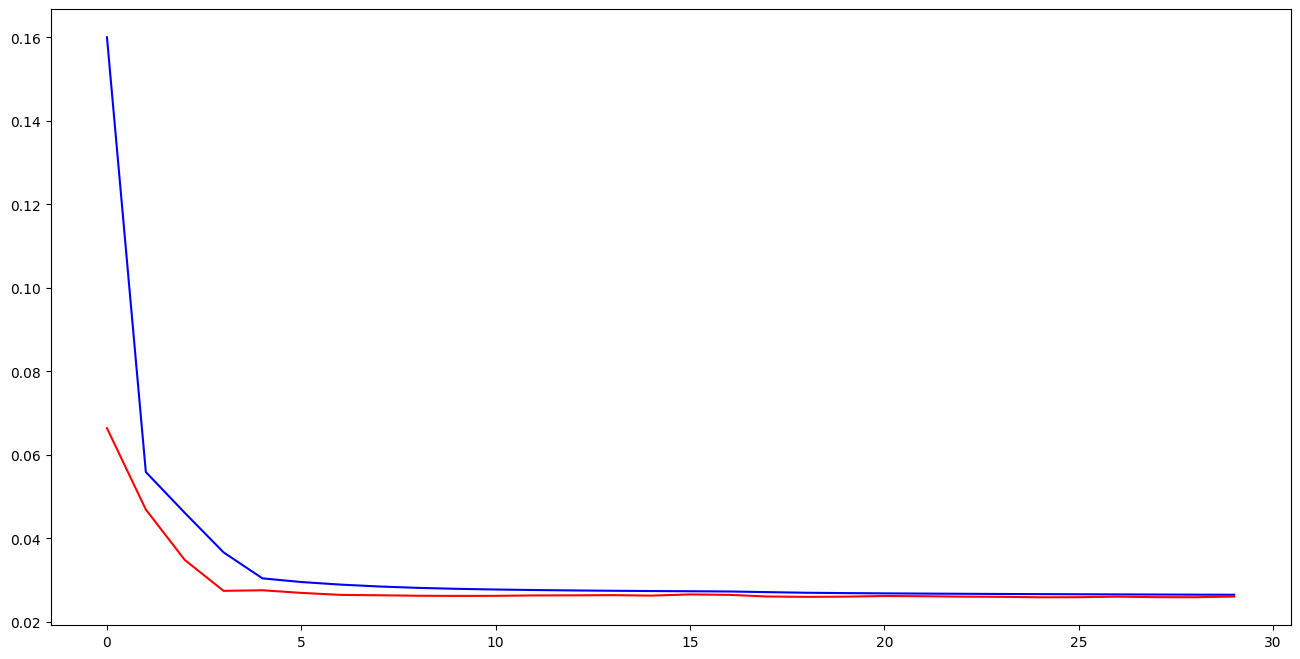

In [6]:
plt.figure(figsize=(16,8), dpi=100)
plt.plot(history.history['loss'], label='Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.show()

## The Root Mean Squared Logarithmic Error for the Testing Data

In [7]:
pred = model.predict(test_x)
rmsle = mean_squared_log_error(test_y, sc.inverse_transform(pred)) ** 0.5
rmsle

12953/12953 [==============================] - 6s 425us/step


3.5484104914329437

## Plotting the Actual vs Predictied Sales

In [8]:
test_y = pd.DataFrame(test_y).reset_index().drop('index',axis=1)
pred = pd.DataFrame(sc.inverse_transform(pred))

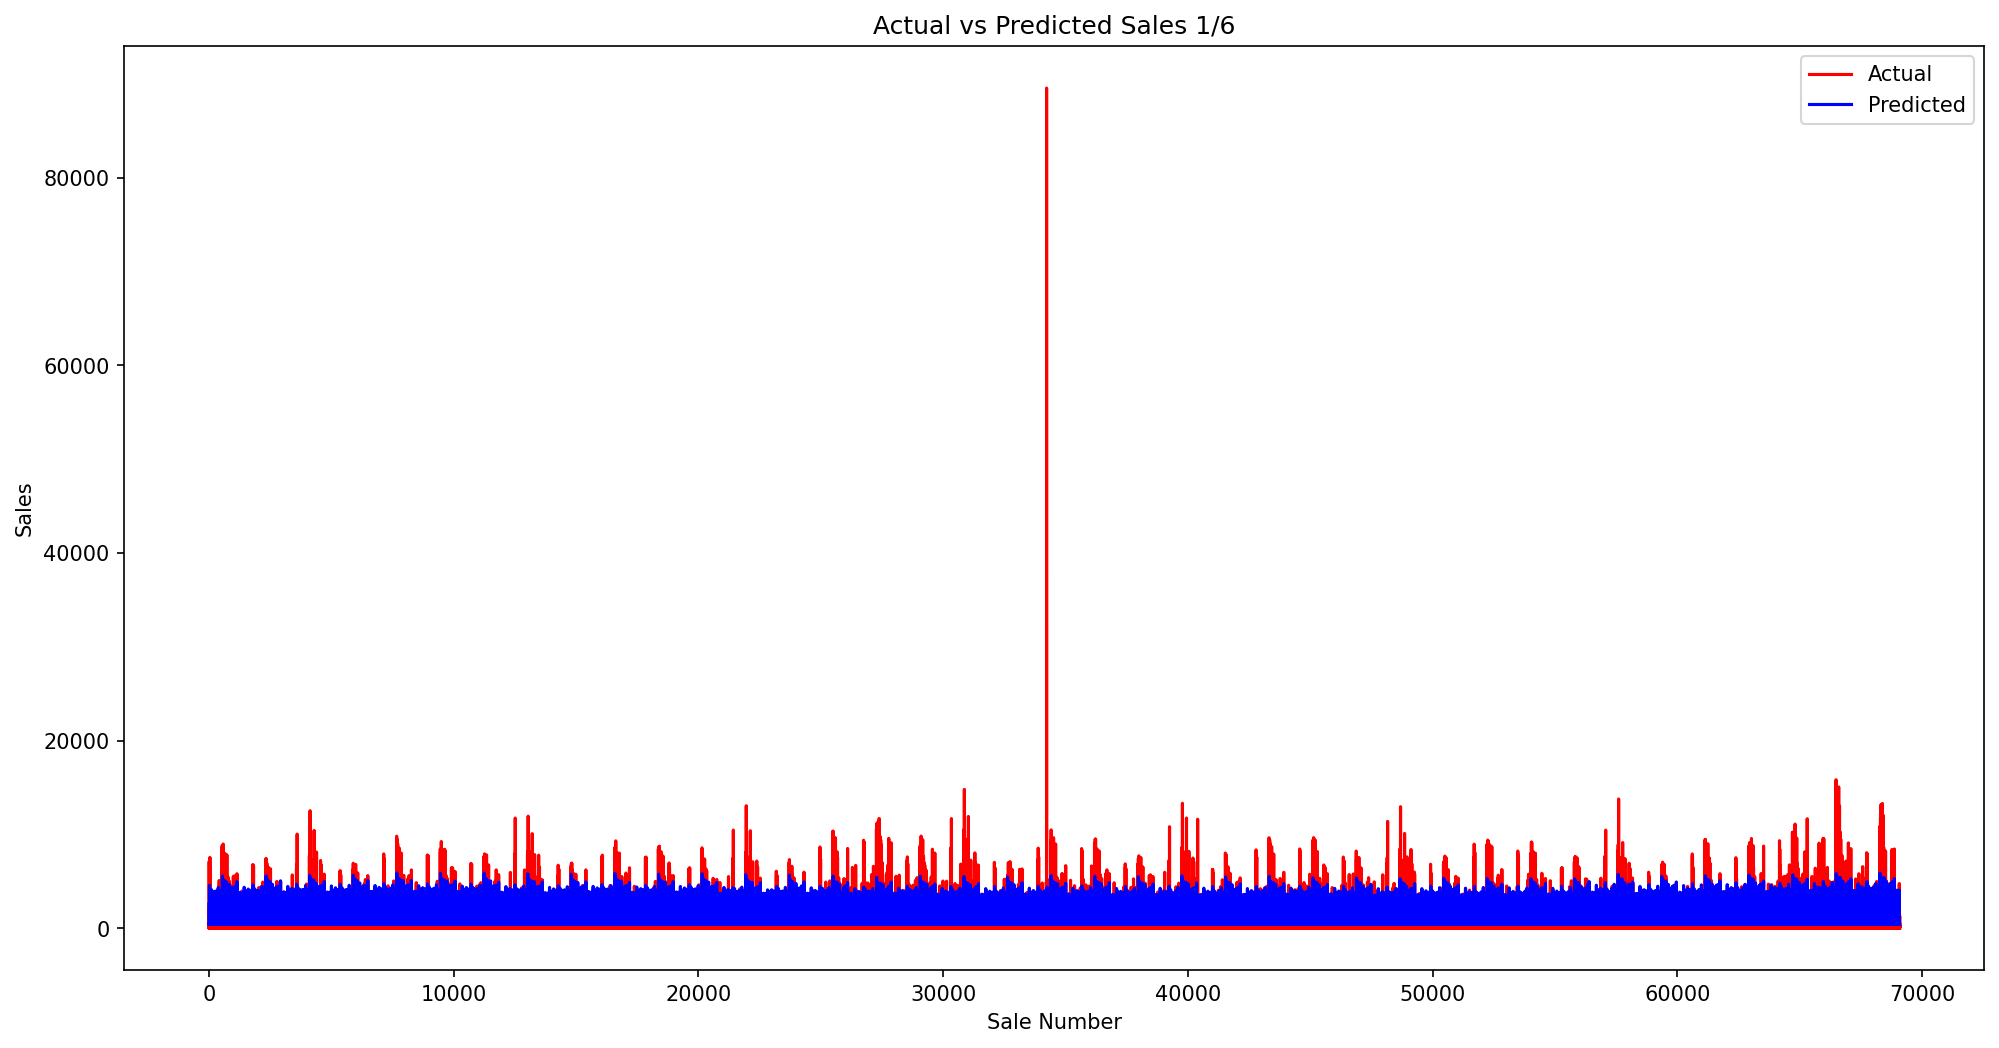

In [19]:
plt.figure(figsize=(16,8), dpi=150)
plt.title('Actual vs Predicted Sales 1/6')
plt.plot(test_y[:len(test_y)//6], label='Actual', color='red')
plt.plot(pred[:len(pred)//6], label='Predicted', color='blue')
plt.xlabel('Sale Number')
plt.ylabel('Sales')
plt.legend()
plt.show()

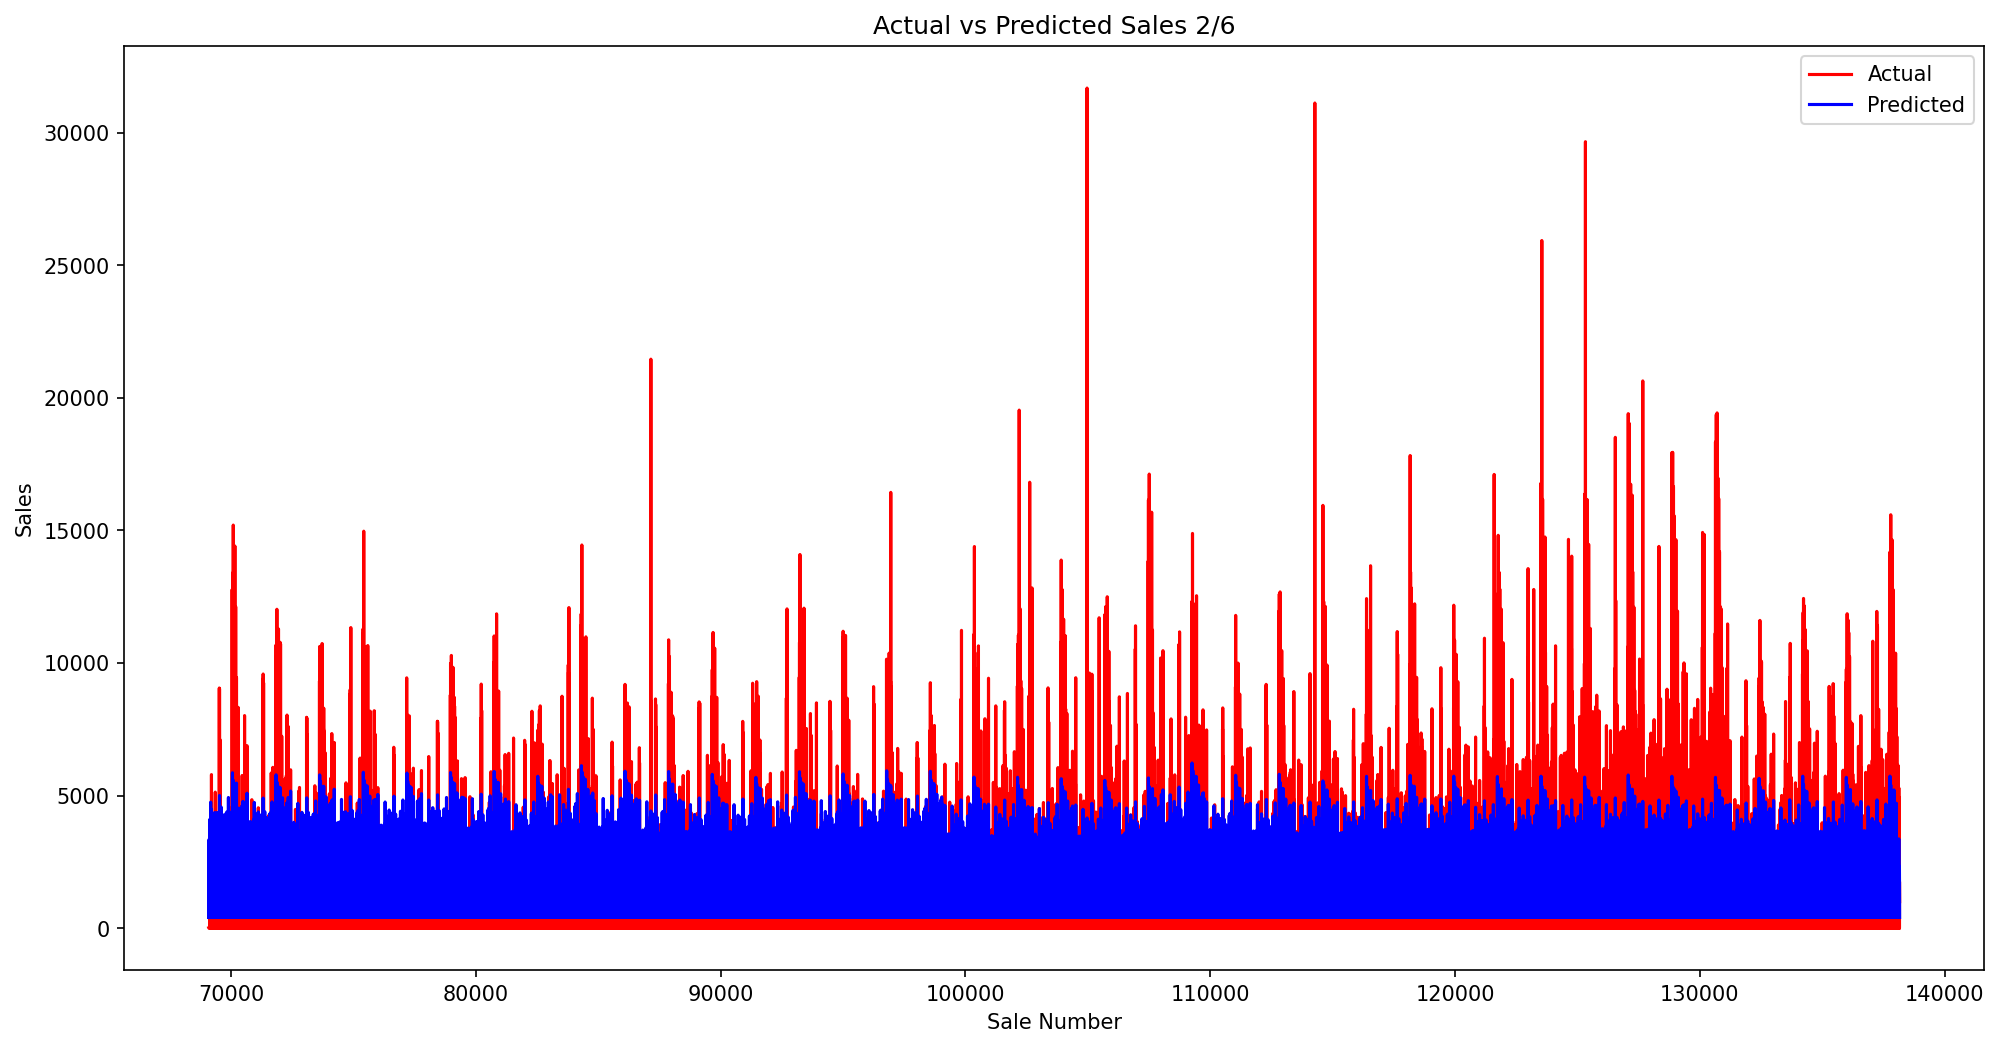

In [26]:
plt.figure(figsize=(16,8), dpi=150)
plt.title('Actual vs Predicted Sales 2/6')
plt.plot(test_y[len(test_y)//6:int(len(test_y)*(2/6))], label='Actual', color='red')
plt.plot(pred[len(pred)//6:int(len(pred)*(2/6))], label='Predicted', color='blue')
plt.xlabel('Sale Number')
plt.ylabel('Sales')
plt.legend()
plt.show()

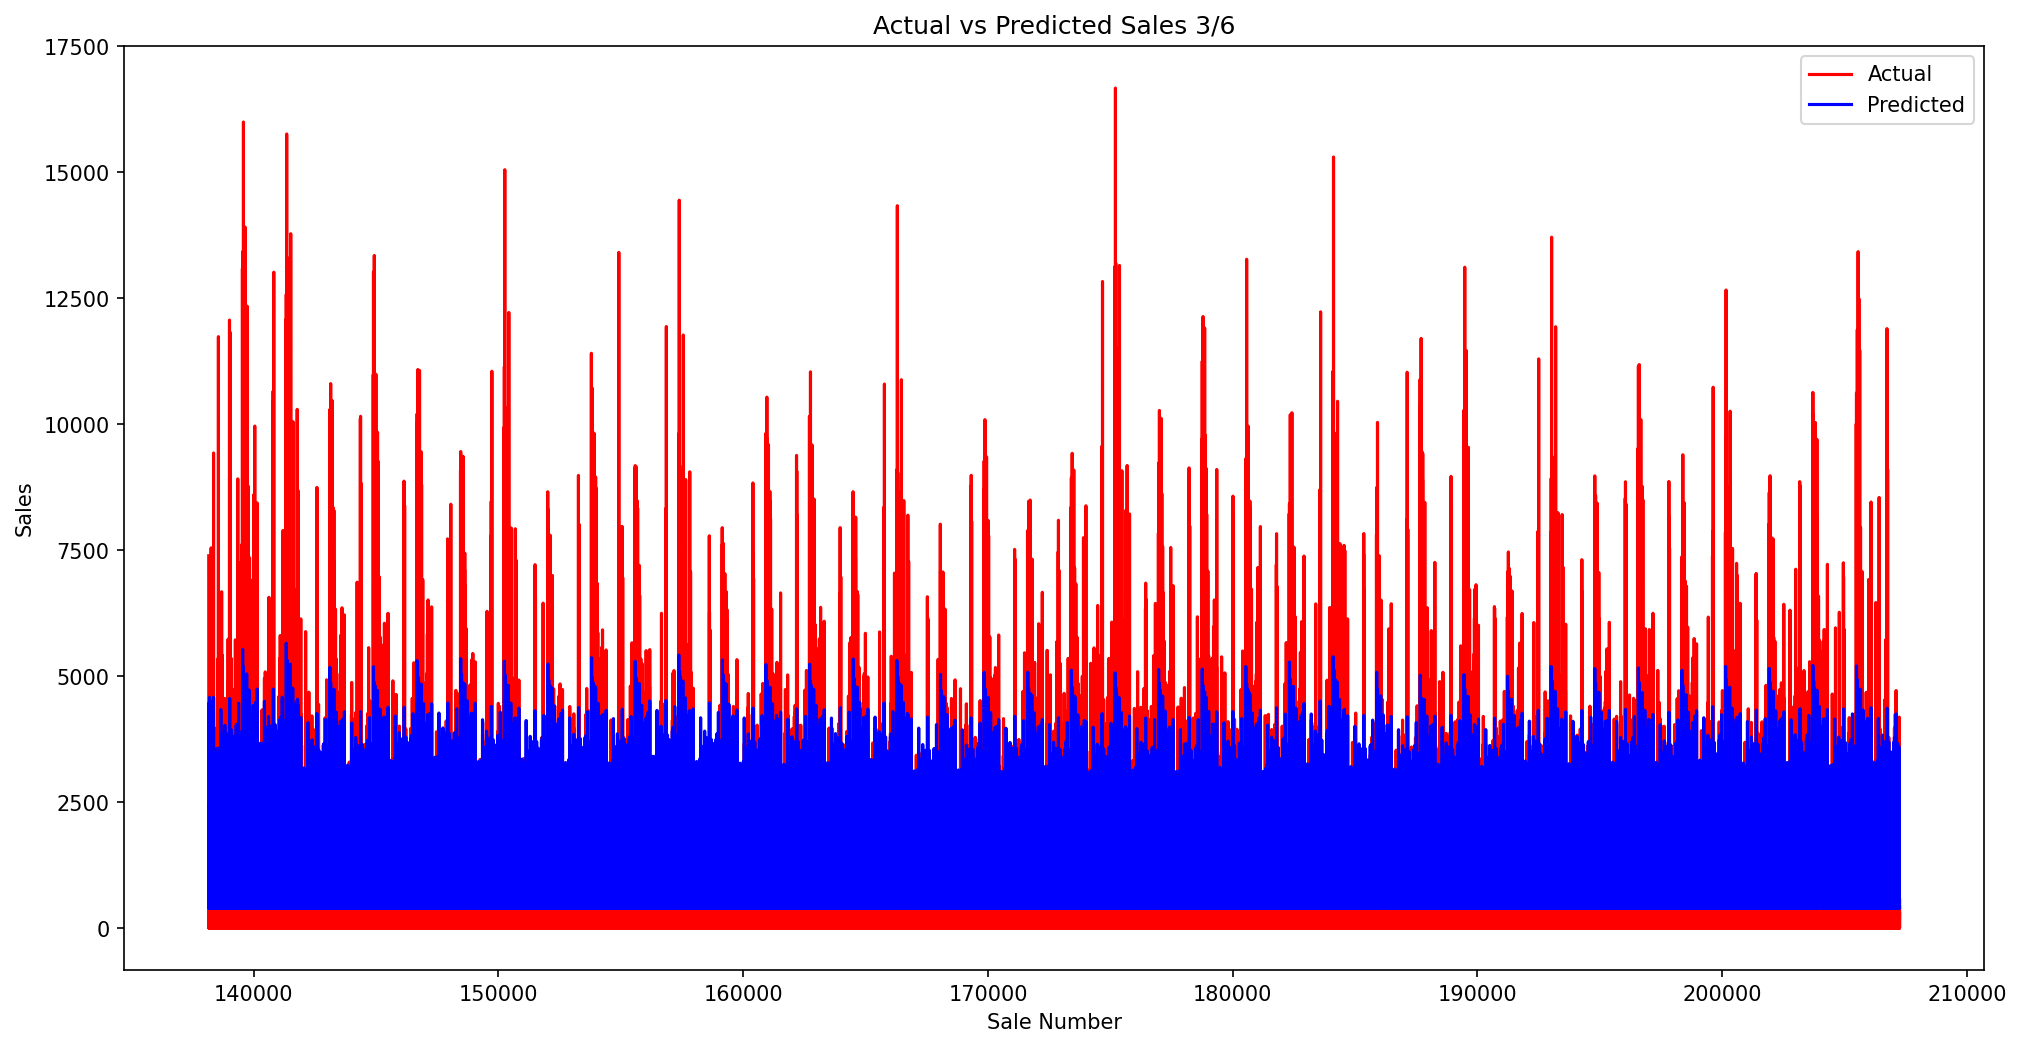

In [27]:
plt.figure(figsize=(16,8), dpi=150)
plt.title('Actual vs Predicted Sales 3/6')
plt.plot(test_y[int(len(test_y)*(2/6)):int(len(test_y)*(3/6))], label='Actual', color='red')
plt.plot(pred[int(len(test_y)*(2/6)):int(len(test_y)*(3/6))], label='Predicted', color='blue')
plt.xlabel('Sale Number')
plt.ylabel('Sales')
plt.legend()
plt.show()

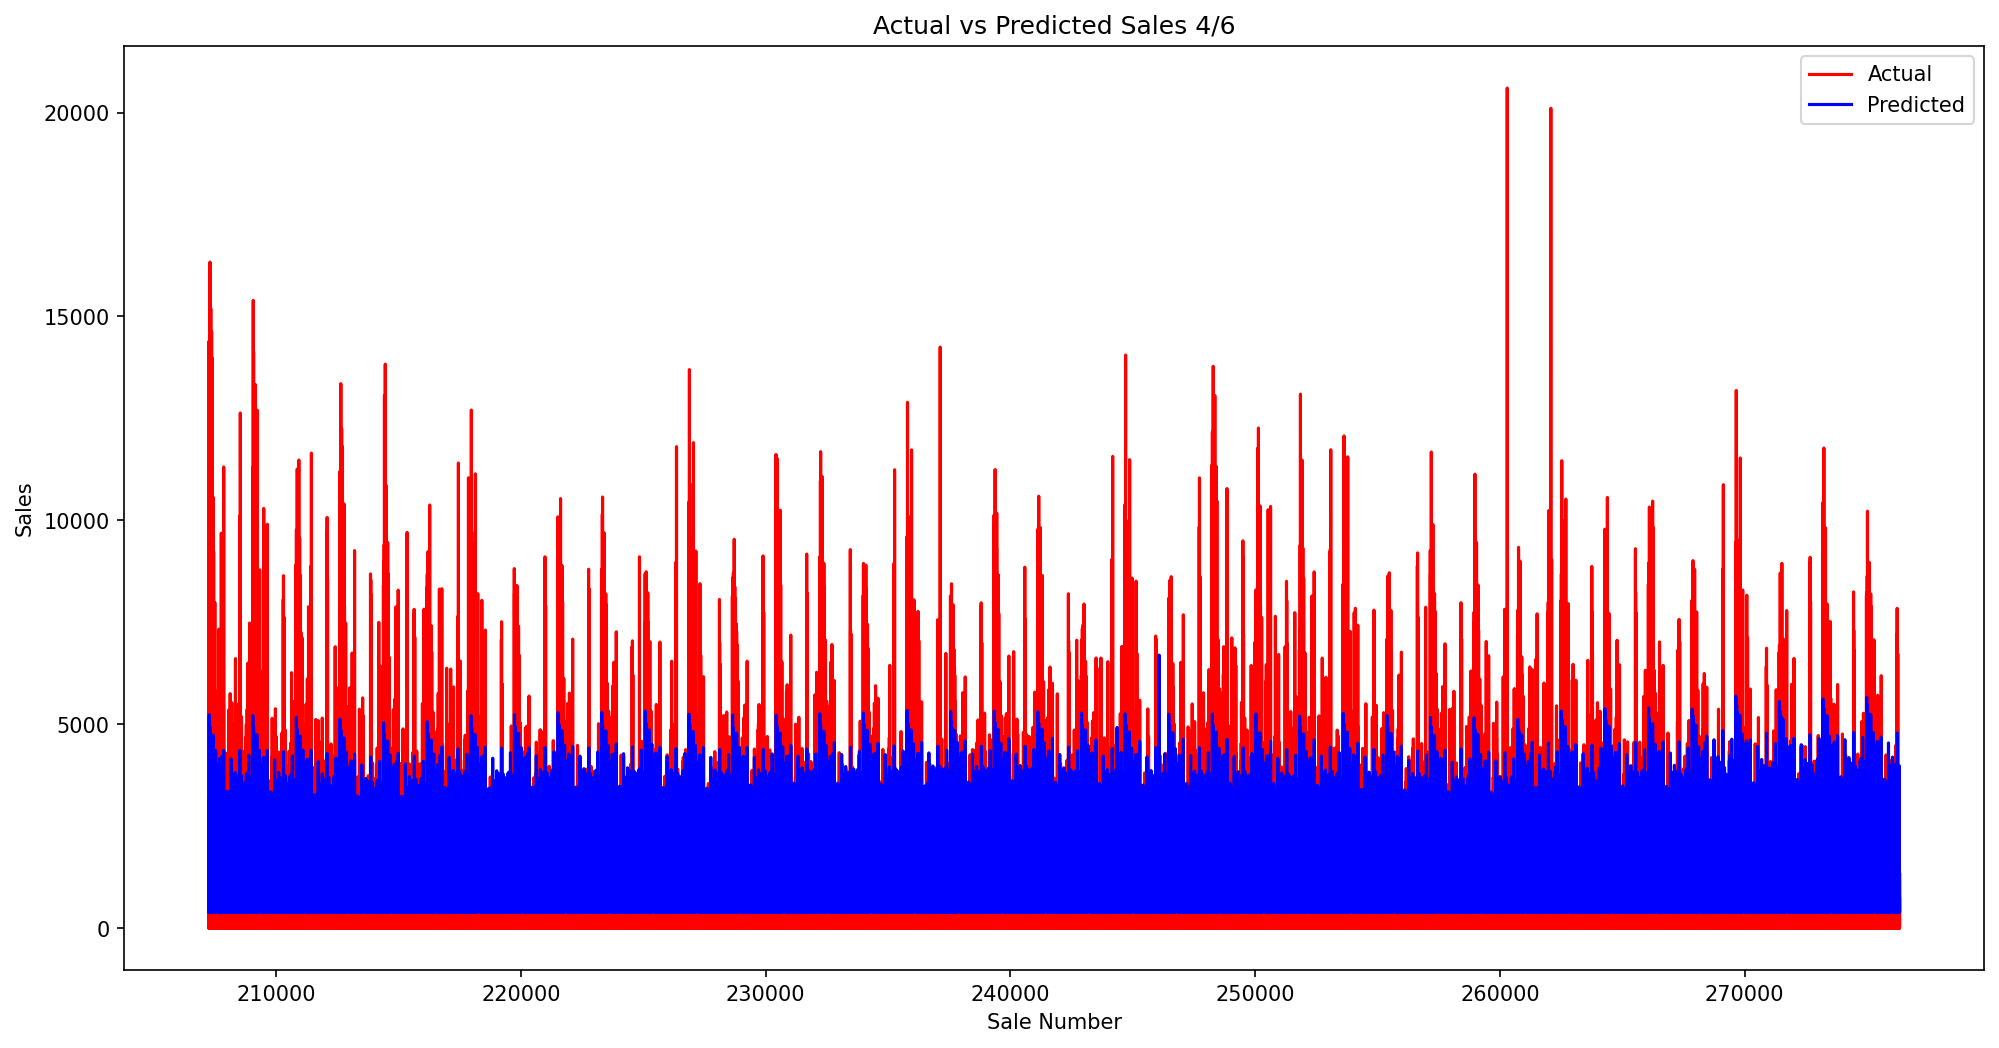

In [28]:
plt.figure(figsize=(16,8), dpi=150)
plt.title('Actual vs Predicted Sales 4/6')
plt.plot(test_y[int(len(test_y)*(3/6)):int(len(test_y)*(4/6))], label='Actual', color='red')
plt.plot(pred[int(len(pred)*(3/6)):int(len(pred)*(4/6))], label='Predicted', color='blue')
plt.xlabel('Sale Number')
plt.ylabel('Sales')
plt.legend()
plt.show()

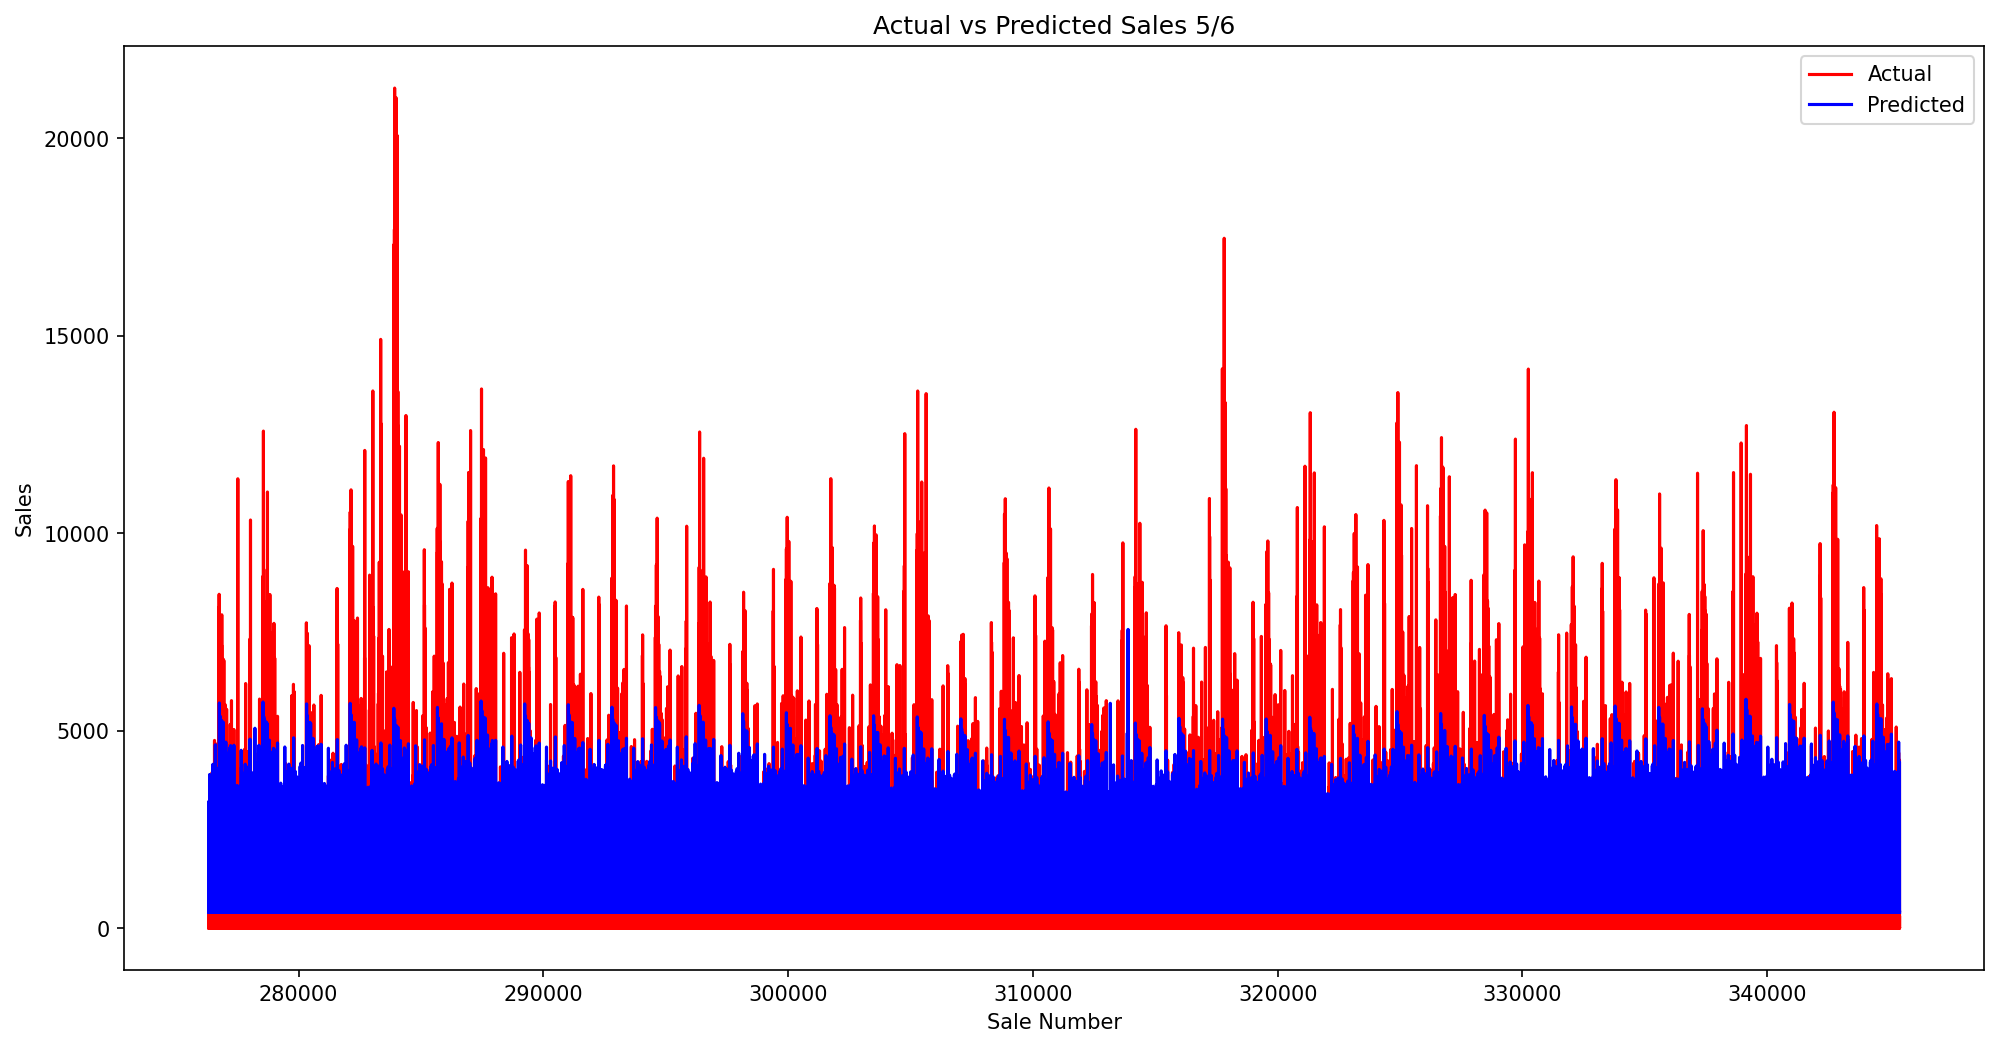

In [29]:
plt.figure(figsize=(16,8), dpi=150)
plt.title('Actual vs Predicted Sales 5/6')
plt.plot(test_y[int(len(test_y)*(4/6)):int(len(test_y)*(5/6))], label='Actual', color='red')
plt.plot(pred[int(len(test_y)*(4/6)):int(len(test_y)*(5/6))], label='Predicted', color='blue')
plt.xlabel('Sale Number')
plt.ylabel('Sales')
plt.legend()
plt.show()

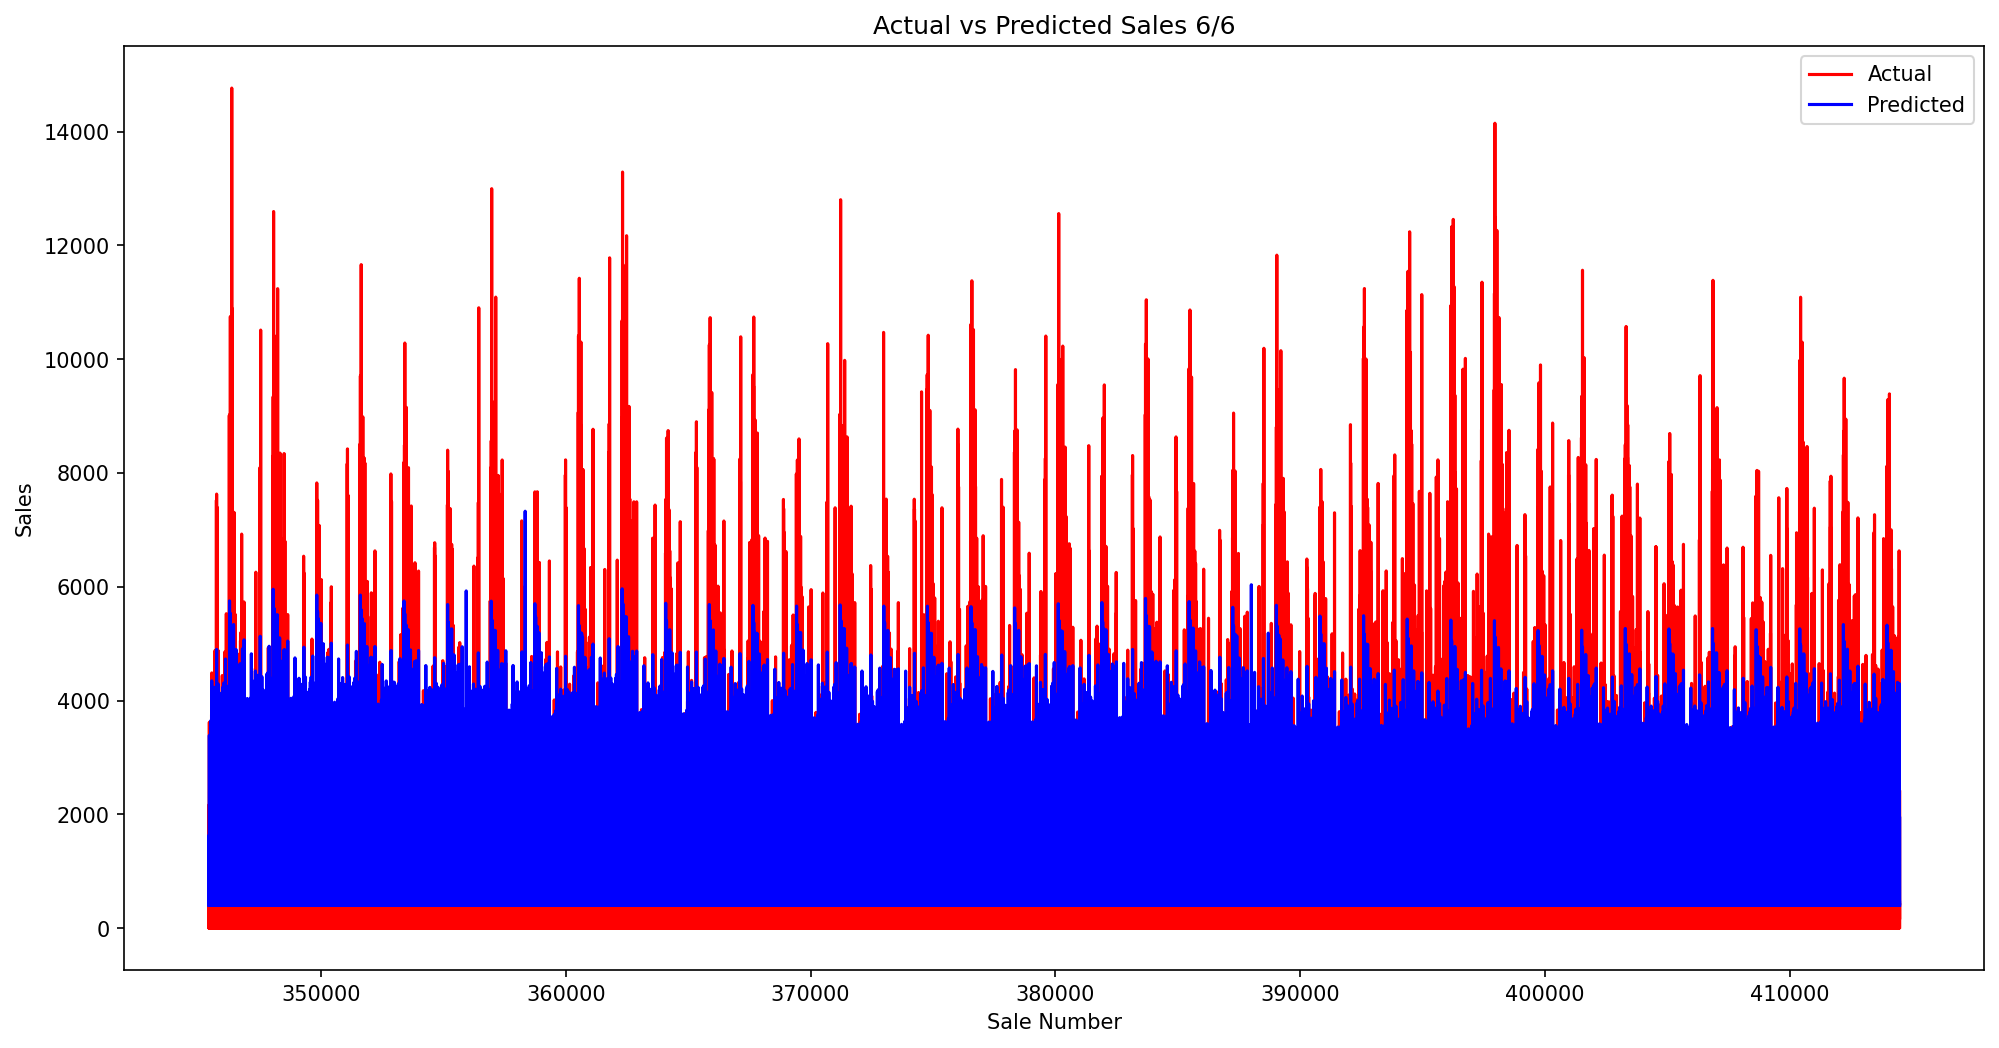

In [31]:
plt.figure(figsize=(16,8), dpi=150)
plt.title('Actual vs Predicted Sales 6/6')
plt.plot(test_y[int(len(test_y)*(5/6)):], label='Actual', color='red')
plt.plot(pred[int(len(test_y)*(5/6)):], label='Predicted', color='blue')
plt.xlabel('Sale Number')
plt.ylabel('Sales')
plt.legend()
plt.show()